In [0]:
#module import
#modules have been given their own cell to avoid having to re-define network or
#perform other operations after terminating runtime sessions


#tensorflow 2.0 modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#helper modules
import matplotlib.pyplot as plt

#dataset module
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
#data loaderrrrrrrrrrrrrrr

(imtrain, labtrain), (imtest, labtest) = datasets.cifar10.load_data()
#convert labels for cross-entropy
labtrain = to_categorical(labtrain)
labtest = to_categorical(labtest)
#normalize pixel values
imtrain, imtest = imtrain / 255.0, imtest / 255.0

#data augmentation :)
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')

#run data augmentor
train_sequence = datagen.flow(imtrain, labtrain, batch_size=64)

#labels do not inherently map to names, so we pre-define them to match a label vector
#doesn't inherently affect training, only for if we humans want to visualize
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#check to see if GPU is available
#print(tf.config.list_physical_devices('GPU'))

In [32]:
#create VGG model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [34]:
#training loop!

#define a certain number of steps so we use all of our data
#steps = int(imtrain.shape[0] / 64) steps_per_epoch=steps, 

#compile
model.compile(optimizer='nadam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

callbacks_list = [tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)]

#train
#history = model.fit(imtrain, labtrain, epochs=50, validation_data=(imtest, labtest))
history = model.fit(train_sequence, steps_per_epoch=200, epochs=100, callbacks=callbacks_list, validation_data=(imtest, labtest))

Epoch 1/100
200/200 [==============================] - 7s 37ms/step - loss: 1.4874 - accuracy: 0.4544 - val_loss: 1.3329 - val_accuracy: 0.5159 - lr: 0.0010
Epoch 2/100
200/200 [==============================] - 7s 36ms/step - loss: 1.3980 - accuracy: 0.4934 - val_loss: 1.1896 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 3/100
200/200 [==============================] - 7s 35ms/step - loss: 1.3353 - accuracy: 0.5180 - val_loss: 1.2660 - val_accuracy: 0.5373 - lr: 0.0010
Epoch 4/100
200/200 [==============================] - 7s 34ms/step - loss: 1.2927 - accuracy: 0.5397 - val_loss: 1.1624 - val_accuracy: 0.5948 - lr: 0.0010
Epoch 5/100
200/200 [==============================] - 7s 35ms/step - loss: 1.2429 - accuracy: 0.5565 - val_loss: 1.0437 - val_accuracy: 0.6246 - lr: 0.0010
Epoch 6/100
200/200 [==============================] - 7s 34ms/step - loss: 1.2042 - accuracy: 0.5779 - val_loss: 1.0653 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 7/100
200/200 [==============================] - 7s 

313/313 - 1s - loss: 0.5447 - accuracy: 0.8185


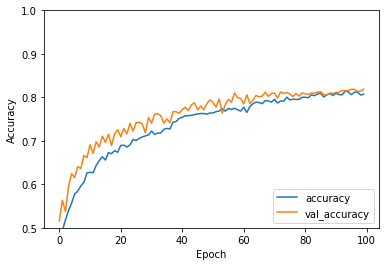

In [35]:
#performance evaluation cell

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  labtest, verbose=2)